<h1>Ge461 Project 2</h1>

<p>The Fashion-MNIST dataset (H. Xiao, K. Rasul, R. Vollgraf, “Fashion-MNIST: A Novel
Image Dataset for Benchmarking Machine Learning Algorithms,” 2017, https://arxiv.org/
abs/1708.07747) is a benchmark dataset for evaluating machine learning algorithms. It con-
tains 28x28 grayscale images of 70,000 clothing items from 10 categories, with 7,000 images
per category (https://github.com/zalandoresearch/fashion-mnist). Each sample is rep-
resented by a vector of length 784 (after flattening the corresponding 28x28 image) and belongs
to one of the following categories, 0: t-shirt/top, 1: trouser, 2: pullover, 3: dress, 4: coat, 5:
sandal, 6: shirt, 7: sneaker, 8: bag, 9: ankle boot.
In this project, the goal is to evaluate several dimensionality reduction techniques for a
classification task. The dataset that will be used consists of a 10,000 item subset of the Fashion-
MNIST collection with 1,000 samples from each category. Example images are shown in Figure
1. The data file (fashion-mnist.zip) that is available on the course home page includes a text
file named fashion mnist data.txt that contains a matrix with 10,000 rows where each row
corresponds to a sample, and another text file named fashion mnist labels.txt that contains
a vector where each value shows the category for the corresponding sample.</p>

## Loading the Dataset 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import TSNE
from tqdm import tqdm
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from tqdm import tqdm
from sklearn.naive_bayes import GaussianNB

np.random.seed(22101761)

In [2]:
labels_data = np.loadtxt('fashion_mnist/fashion_mnist_labels.txt',dtype=int)
print(labels_data[0])

9


(-0.5, 27.5, 27.5, -0.5)

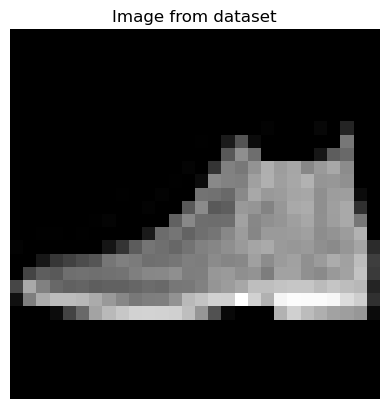

In [3]:
fashion_images = np.loadtxt('fashion_mnist/fashion_mnist_data.txt')

fashion_images_reshaped = np.reshape(fashion_images, (10000,28,28))

plt.imshow(fashion_images[0].reshape((28,28)).T,cmap='gray')
plt.title('Image from dataset')
plt.axis("off")


## Splitting the Test and Train Set

In [4]:
n_samples = fashion_images.shape[0]
d = fashion_images.shape[1]
train_idx = []
test_idx = []
classes = np.unique(labels_data)
for cls in classes:
    indices = np.where(labels_data == cls)[0]
    np.random.shuffle(indices)
    split = len(indices) // 2
    train_idx.extend(indices[:split])
    test_idx.extend(indices[split:])

In [5]:
np.random.shuffle(train_idx)
np.random.shuffle(test_idx)

train_set_x = fashion_images[train_idx] 
train_set_y = labels_data[train_idx] 


test_set_x = fashion_images[test_idx] 
test_set_y = labels_data[test_idx] 



## Question 1

In [6]:
general_mean = np.mean(fashion_images,axis=0)

centered_train_set_x = train_set_x - general_mean
centered_test_set_x = test_set_x - general_mean


In [7]:
hold = centered_train_set_x.shape[1]

In [8]:
pca = PCA(n_components=hold)
pca.fit(centered_train_set_x)

PCA(n_components=784)

Text(0.5, 1.0, 'Eigenvalues in Descending Order')

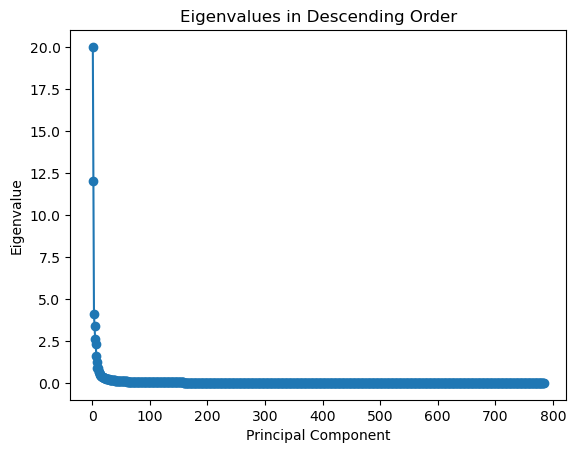

In [9]:
eigenvalues_pca = pca.explained_variance_


plt.figure()
plt.plot(range(1,785), eigenvalues_pca,marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title('Eigenvalues in Descending Order')




Text(0.5, 1.0, 'Variance Ratio Principal Component')

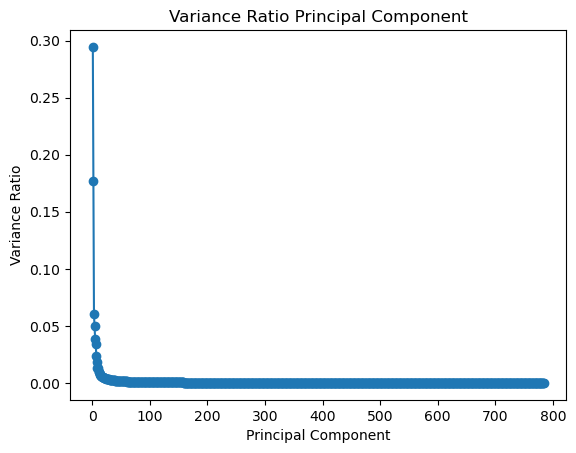

In [10]:
pca_variance  = pca.explained_variance_ratio_


plt.figure()
plt.plot(range(1,785), pca_variance,marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Variance Ratio')
plt.title('Variance Ratio Principal Component')

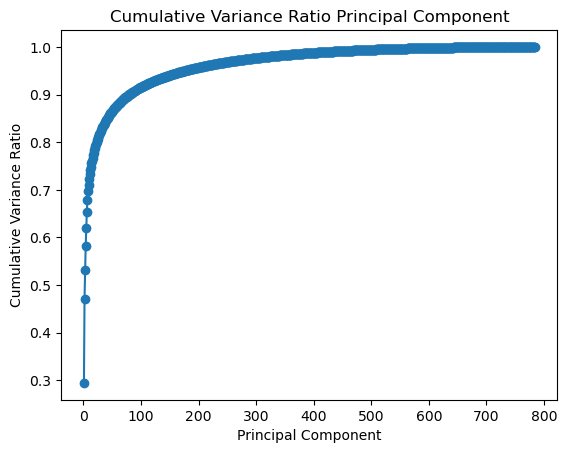

In [11]:
plt.figure()
plt.plot(range(1,785), np.cumsum(pca.explained_variance_ratio_),marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Variance Ratio')
plt.title('Cumulative Variance Ratio Principal Component')
plt.show()

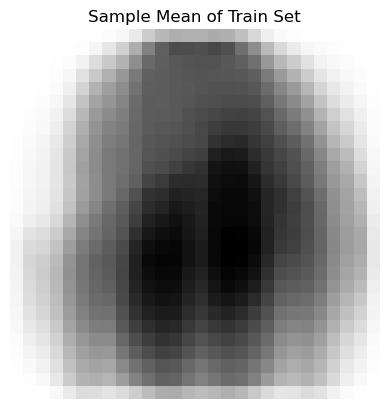

In [12]:
global_mean_train = np.mean(train_set_x,axis=0)

plt.figure()
plt.imshow(global_mean_train.reshape((28,28)).T,cmap='gray_r')
plt.title('Sample Mean of Train Set')
plt.axis("off")
plt.show()

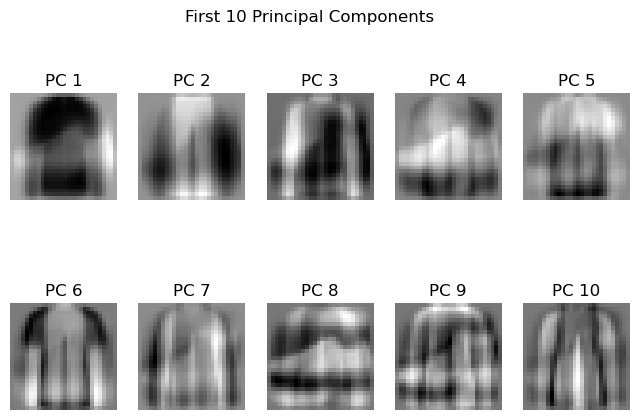

In [13]:
eigenvectors = pca.components_[:10]
fig, axes = plt.subplots(2, 5, figsize=(8, 5))
for i, ax in enumerate(axes.flatten()):
        ax.imshow(eigenvectors[i].reshape(28, 28).T, cmap='gray_r')
        ax.set_title(f'PC {i+1}')
        ax.axis('off')
plt.suptitle('First 10 Principal Components')
plt.show()

In [14]:
dims = np.linspace(1, 400, num=35, dtype=int)

models = []
error_test = []
error_train = []

for dim in tqdm(dims):
    pca = PCA(n_components=dim)
    X_train_pca = pca.fit_transform(centered_train_set_x)
    X_test_pca = pca.transform(centered_test_set_x)
    model = QuadraticDiscriminantAnalysis().fit(X_train_pca, train_set_y)

    score_test =  1 - model.score(X_test_pca,test_set_y)
    error_test.append(score_test)

    score_train =  1 - model.score(X_train_pca,train_set_y)
    error_train.append(score_train)

    models.append(model)
    print(f"PCA Dim: {dim}, Test Error: {score_test:.4f} Train Error: {score_train:.4f}")

    


  3%|▎         | 1/35 [00:01<01:07,  1.98s/it]

PCA Dim: 1, Test Error: 0.6958 Train Error: 0.6886


  6%|▌         | 2/35 [00:07<02:13,  4.06s/it]

PCA Dim: 12, Test Error: 0.2460 Train Error: 0.2300


  9%|▊         | 3/35 [00:13<02:43,  5.10s/it]

PCA Dim: 24, Test Error: 0.2118 Train Error: 0.1870


 11%|█▏        | 4/35 [00:21<03:08,  6.09s/it]

PCA Dim: 36, Test Error: 0.2058 Train Error: 0.1740


 14%|█▍        | 5/35 [00:29<03:23,  6.80s/it]

PCA Dim: 47, Test Error: 0.2022 Train Error: 0.1530


 17%|█▋        | 6/35 [00:38<03:35,  7.44s/it]

PCA Dim: 59, Test Error: 0.2016 Train Error: 0.1406


 20%|██        | 7/35 [00:46<03:37,  7.76s/it]

PCA Dim: 71, Test Error: 0.1998 Train Error: 0.1256


 20%|██        | 7/35 [00:52<03:28,  7.45s/it]


KeyboardInterrupt: 

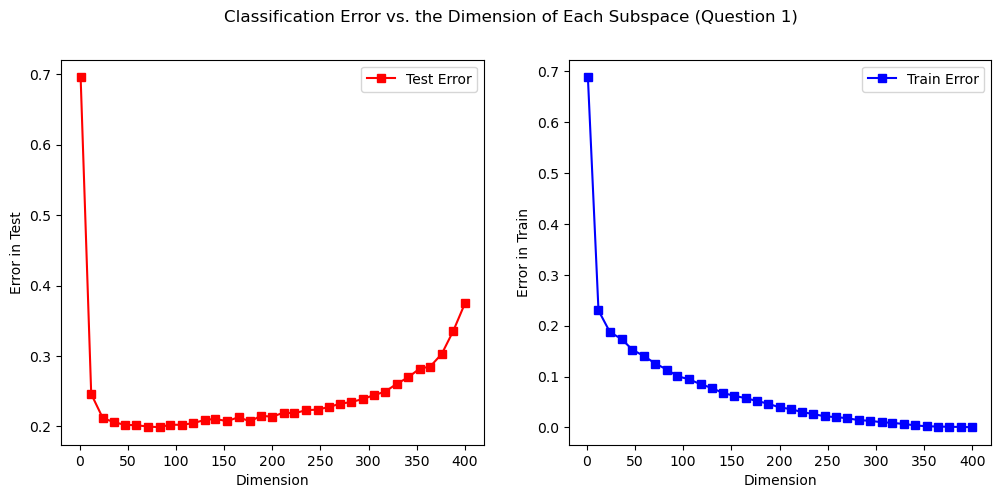

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot for Test Error with red color
axes[0].plot(dims, error_test, marker='s', color='red', label='Test Error')
axes[0].set_xlabel('Dimension')
axes[0].set_ylabel('Error in Test')
axes[0].legend()

# Plot for Train Error with blue color
axes[1].plot(dims, error_train, marker='s', color='blue', label='Train Error')
axes[1].set_xlabel('Dimension')
axes[1].set_ylabel('Error in Train')
axes[1].legend()

plt.suptitle('Classification Error vs. the Dimension of Each Subspace (Question 1)')
plt.show()

## Question 2

In [24]:
clf = LinearDiscriminantAnalysis(n_components=9)
clf.fit_transform(train_set_x, train_set_y)


array([[-2.97085452e+00, -1.08997851e+00,  1.17665825e+00, ...,
         3.03156141e+00,  8.89648068e-02,  1.05845879e-01],
       [-1.74865271e+00,  1.87257219e+00,  1.34832476e+00, ...,
        -1.78744334e+00, -8.32210496e-02, -6.88633581e-01],
       [-1.98849898e+00,  2.29001630e+00,  1.72409835e+00, ...,
         1.50017861e+00, -2.62767332e+00, -1.80546690e+00],
       ...,
       [-2.70594674e+00,  3.51931271e-01,  3.69795274e-01, ...,
        -3.54614567e+00,  8.77274704e-01, -9.55670286e-01],
       [-4.85636611e+00, -5.35116890e+00, -1.92600224e-01, ...,
         8.41868238e-01, -1.08668498e-03,  2.94473875e-01],
       [ 1.43426771e+00,  1.74636353e+00, -1.32789728e-02, ...,
        -8.09963029e-01, -3.02358271e-01, -5.43666450e-01]])

Text(0.5, 0.98, 'LDA Components')

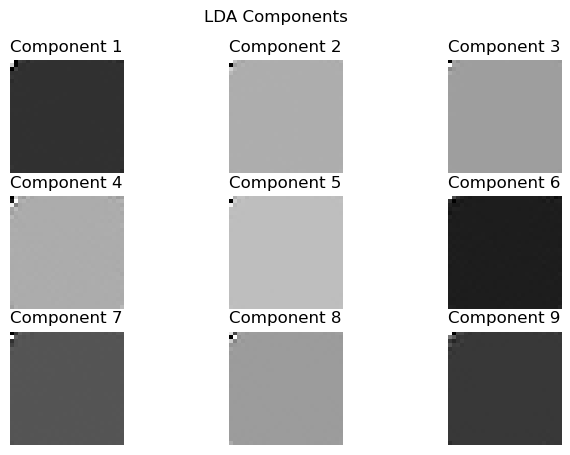

In [27]:
# Plot each LDA basis as an image.

lda_components = clf.scalings_[:,:9]

fig, axes = plt.subplots(3, 3, figsize=(8, 5))
for i, ax in enumerate(axes.flatten()):
        ax.imshow(lda_components[:, i].reshape(28, 28).T, cmap='gray_r')
        ax.set_title(f'Component {i+1}')
        ax.axis('off')

plt.suptitle('LDA Components')




In [103]:
dims_list = np.arange(1,10)

model_lda = []

error_test_lda = []
error_train_lda = []
for dim in dims_list:
    clf = LinearDiscriminantAnalysis(n_components=dim)
    X_train_lda = clf.fit_transform(train_set_x, train_set_y)
    X_test_lda = clf.transform(test_set_x)
    model = QuadraticDiscriminantAnalysis().fit(X_train_lda, train_set_y)

    score_test =  1 - model.score(X_test_lda,test_set_y)
    error_test_lda.append(score_test)

    score_train =  1 - model.score(X_train_lda,train_set_y)
    error_train_lda.append(score_train)

    model_lda.append(model)


    print(f"LDA Dim: {dim}, Test Error: {score_test:.4f}, Train Error: {score_train:.4f}")
    

LDA Dim: 1, Test Error: 0.5624, Train Error: 0.5228
LDA Dim: 2, Test Error: 0.4338, Train Error: 0.3844
LDA Dim: 3, Test Error: 0.3832, Train Error: 0.3334
LDA Dim: 4, Test Error: 0.3328, Train Error: 0.2826
LDA Dim: 5, Test Error: 0.2874, Train Error: 0.2248
LDA Dim: 6, Test Error: 0.2578, Train Error: 0.1976
LDA Dim: 7, Test Error: 0.2430, Train Error: 0.1786
LDA Dim: 8, Test Error: 0.2116, Train Error: 0.1282
LDA Dim: 9, Test Error: 0.2044, Train Error: 0.1090


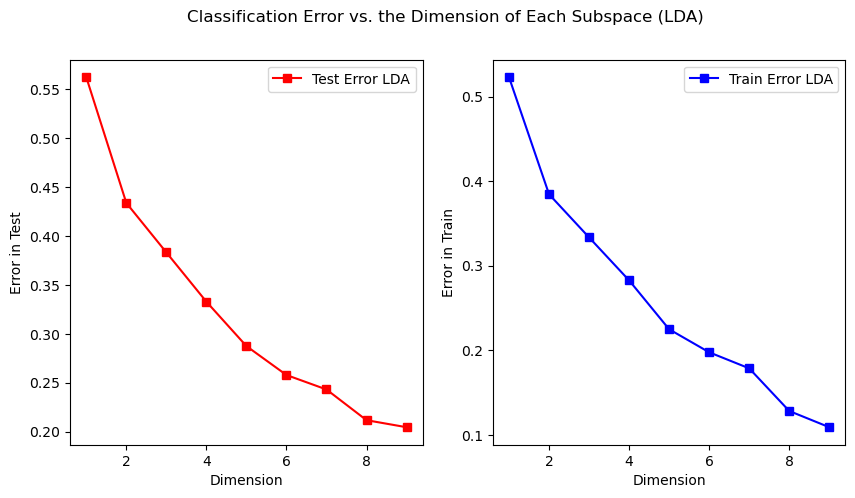

In [104]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot for Test Error with red color
axes[0].plot(dims_list, error_test_lda, marker='s', color='red', label='Test Error LDA')
axes[0].set_xlabel('Dimension')
axes[0].set_ylabel('Error in Test')
axes[0].legend()

# Plot for Train Error with blue color
axes[1].plot(dims_list, error_train_lda, marker='s', color='blue', label='Train Error LDA')
axes[1].set_xlabel('Dimension')
axes[1].set_ylabel('Error in Train')
axes[1].legend()

plt.suptitle('Classification Error vs. the Dimension of Each Subspace (LDA)')
plt.show()

## Question 3

In [122]:
def question_3(perplexity,n_iter,learning_rate,axs):

    tsne = TSNE(n_components=2, init='pca', random_state=22101761, perplexity=perplexity, n_iter=n_iter,learning_rate=learning_rate)
    X_tsne = tsne.fit_transform(fashion_images)

    
    scatter = axs.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels_data, cmap='tab10', alpha=0.7)
    axs.set_xlabel('t-SNE Dimension 1')
    axs.set_ylabel('t-SNE Dimension 2')
    axs.set_title(f' perplexity = {perplexity}, number of iterations = {n_iter}, learning rate = {learning_rate} ')
    return scatter


   

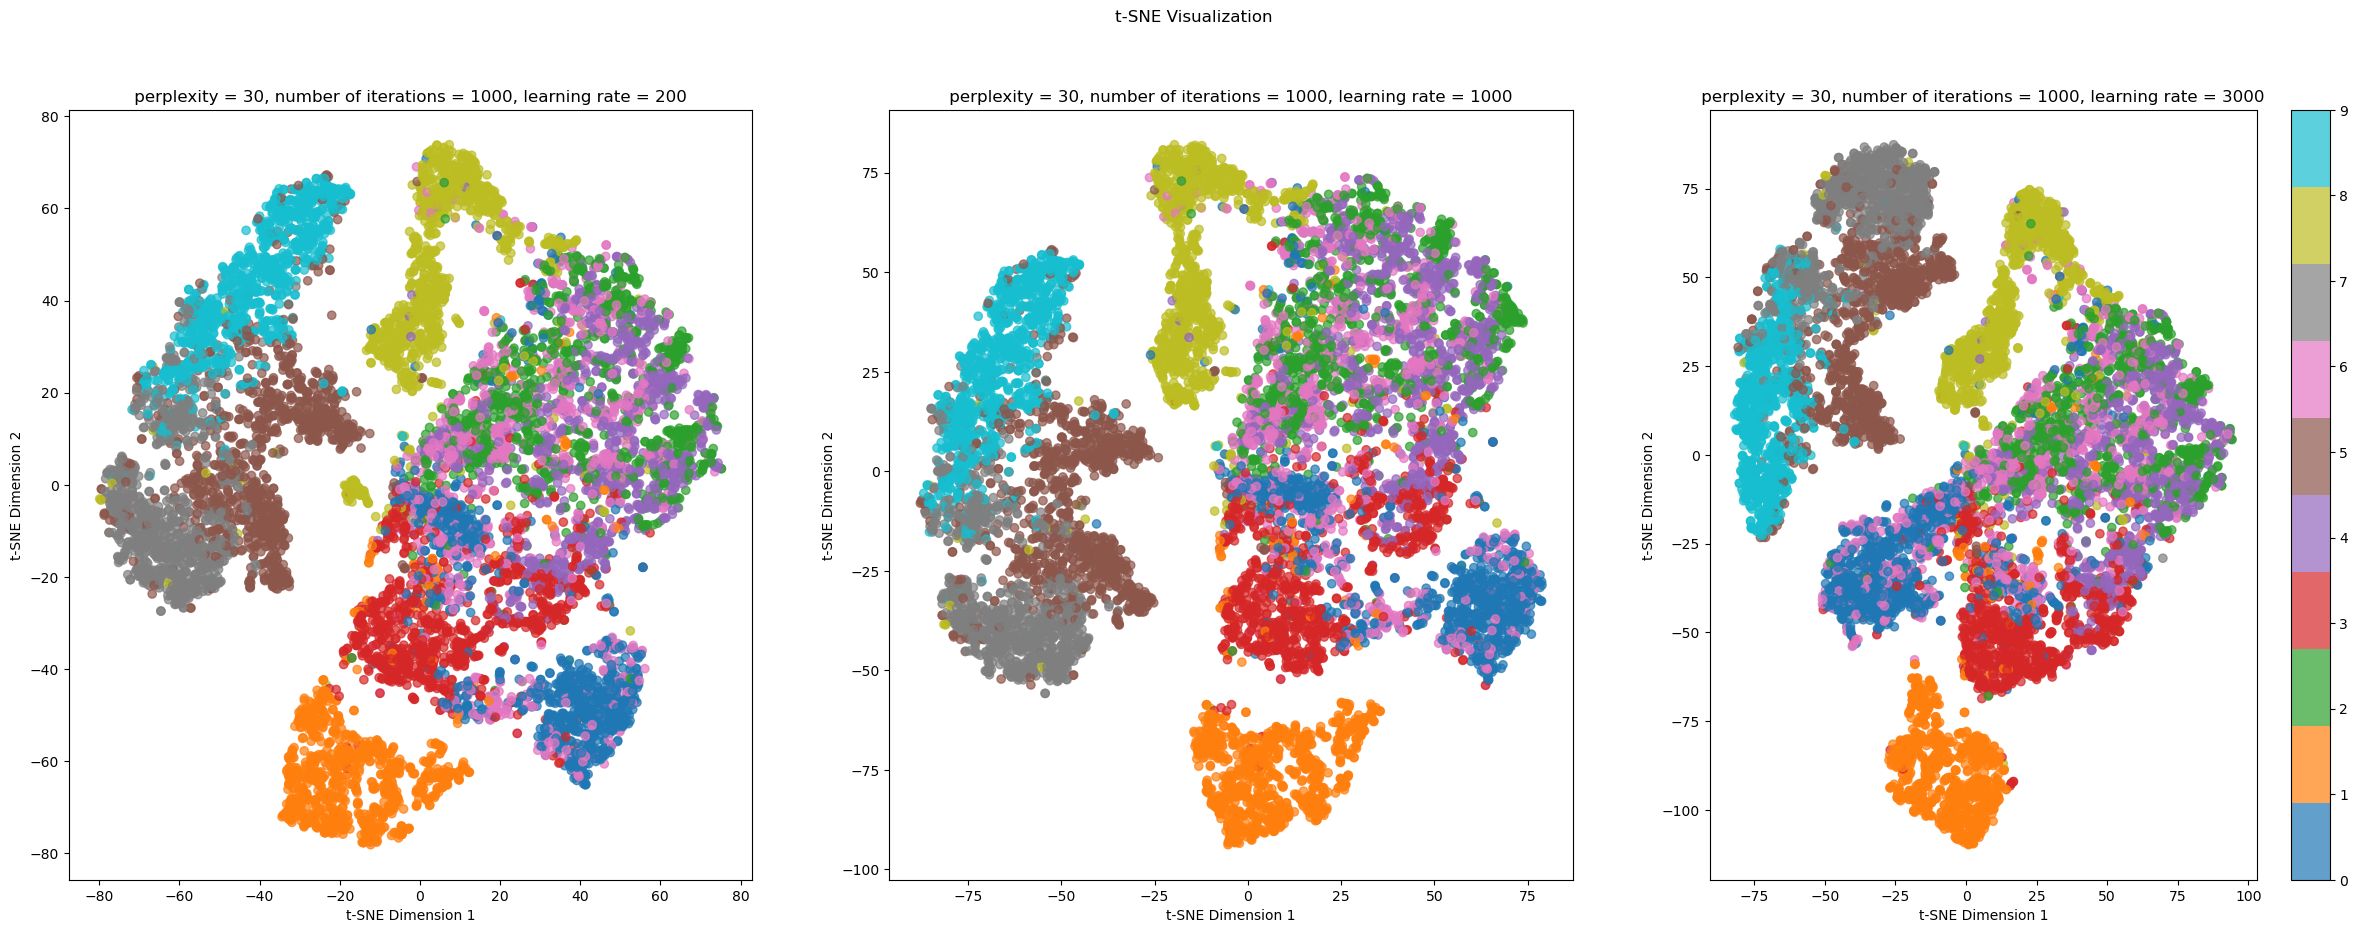

In [127]:
lr = [200,1000,3000]
fig, axes = plt.subplots(1, 3, figsize=(30, 10))

perplexity = 30
n_iter = 1000

for i in range(len(lr)):
    scatter = question_3(perplexity,n_iter,lr[i],axes[i])

plt.suptitle('t-SNE Visualization')
plt.colorbar(scatter, ticks=np.arange(10))



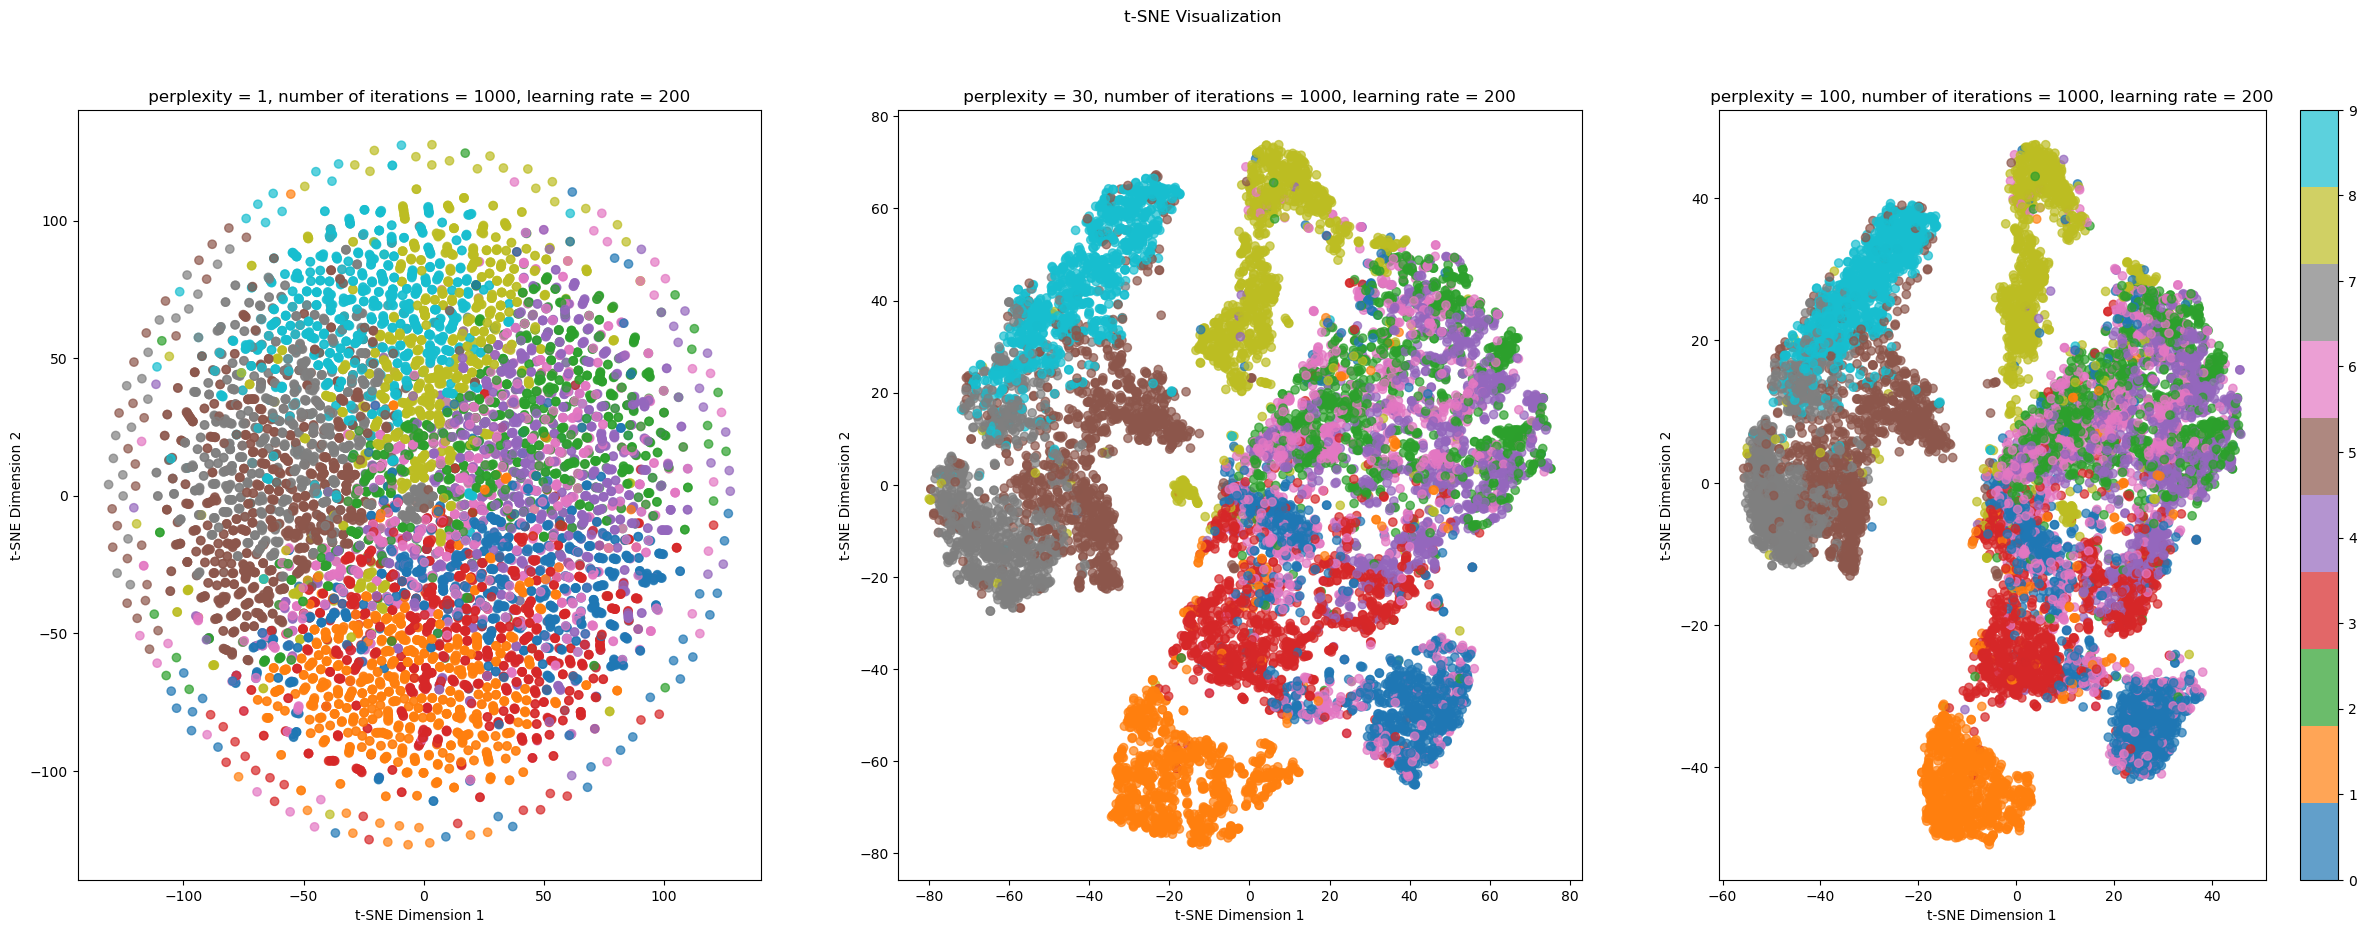

In [130]:
perplexity = [1,30,100]
fig, axes = plt.subplots(1, 3, figsize=(30, 10))

lr = 200
n_iter = 1000

for i in range(len(perplexity)):
    scatter = question_3(perplexity[i],n_iter,lr,axes[i])

plt.suptitle('t-SNE Visualization')
plt.colorbar(scatter, ticks=np.arange(10))

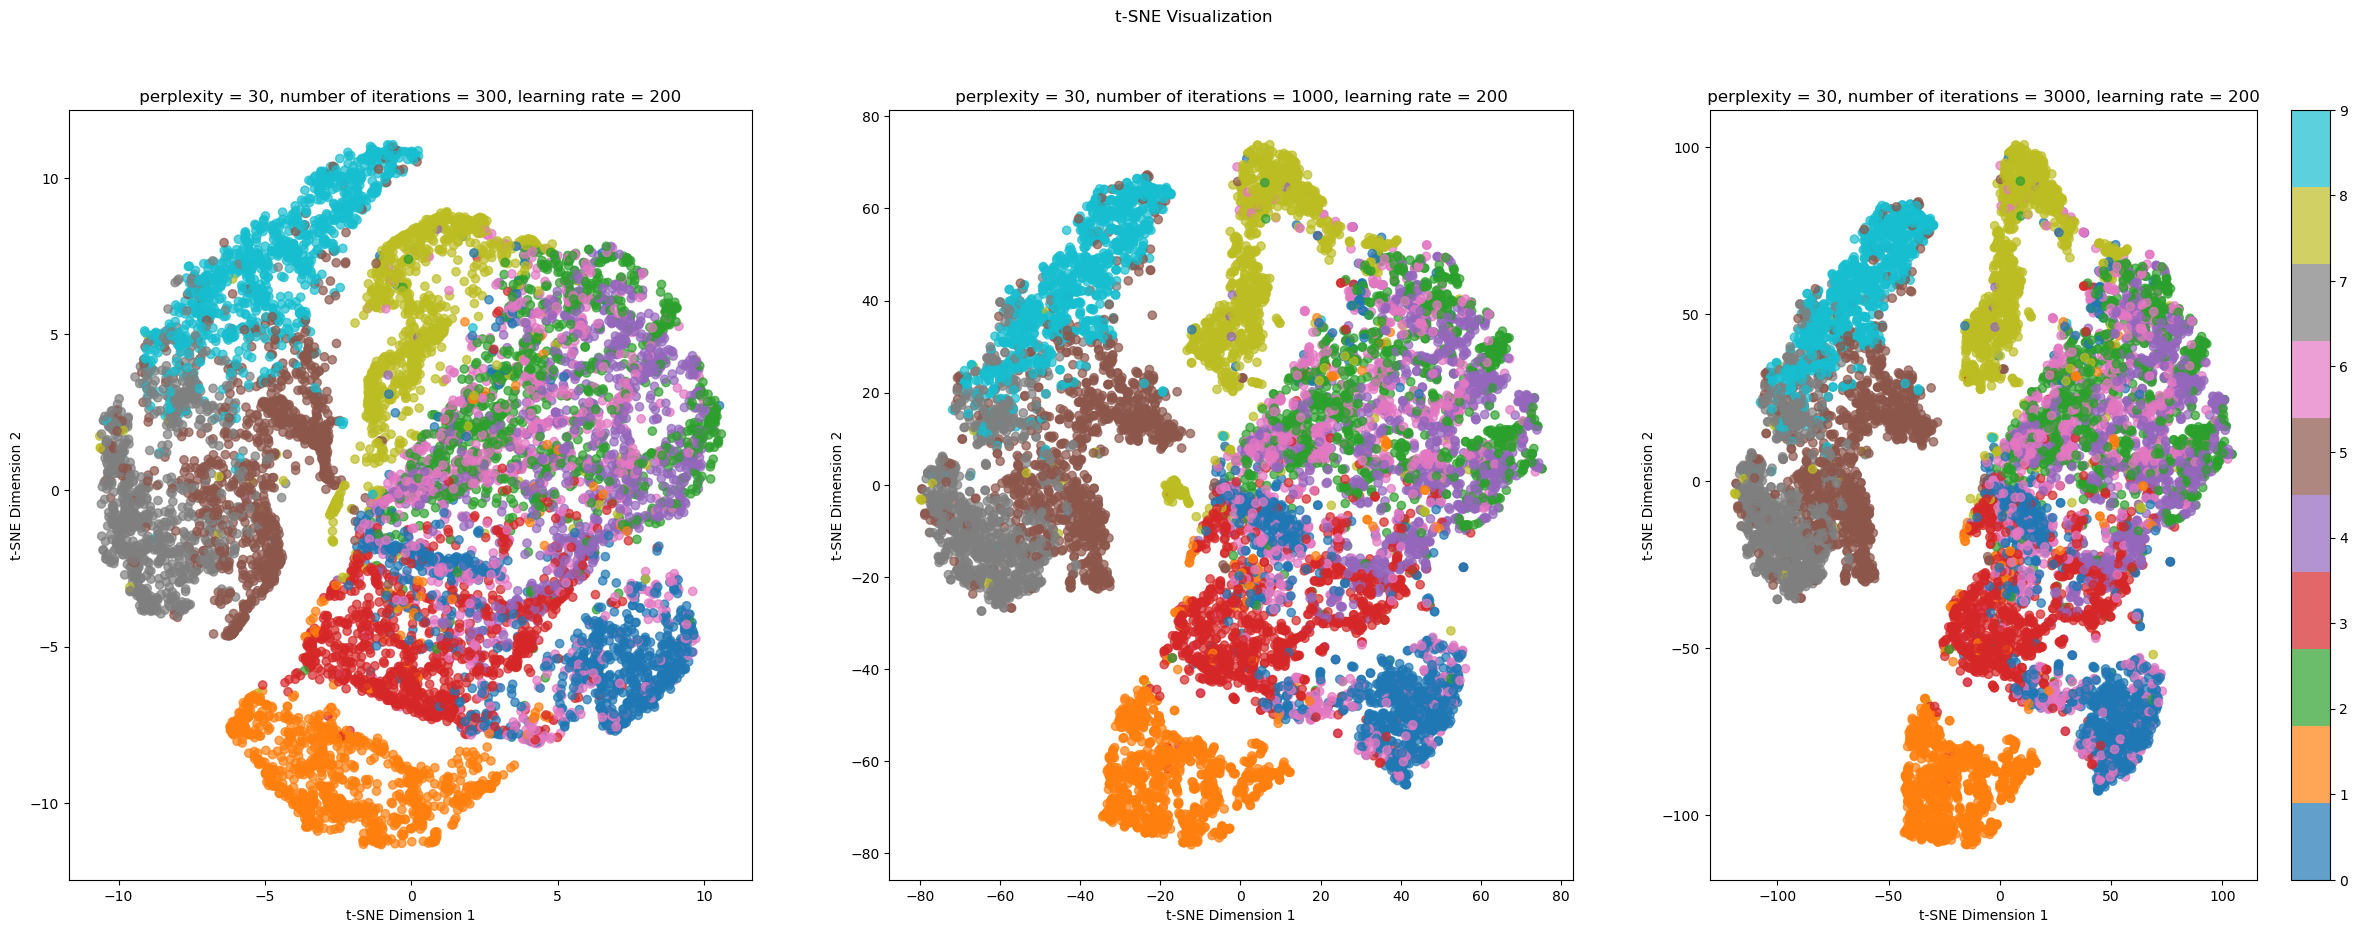

In [134]:
n_iter = [300,1000,3000]
fig, axes = plt.subplots(1, 3, figsize=(30, 10))

lr = 200
perplexity = 30

for i in range(len(n_iter)):
    scatter = question_3(perplexity,n_iter[i],lr,axes[i])

plt.suptitle('t-SNE Visualization')
plt.colorbar(scatter, ticks=np.arange(10))